# Construção Manual

1. Representação do modelo ($y(x)=\theta_0+x\theta_1$) (OK)
2. Definição da função de custo J (OK)
3. Função otimização (Gradiente descendente) (OK)
4. Atualização dos parâmetros (OK)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Função de custo

$J(\theta_0,\theta_1)=\frac{1}{2m}\sum^m_{i=1}(y_i-\hat{y_i})^2$

In [30]:
def calcula_custo(theta, x, y):
    
    #Capturando o número de amostras
    m = len(y)
    
    #Criando matriz para multiplicação
    x_new = np.c_[np.ones(m),x]
    
    #calculando y-chapeu    
    y_hat = np.dot(x_new,theta)
    
    #Calculando o custo
    J = (1/(2*m))*np.sum(np.square(y-np.ravel(y_hat)))
    
    return J

In [4]:
x = y = [0,1,2,3,4]

In [5]:
theta_certo = [[0],[1]]
theta_errado = [[0],[2]]
theta_viajando = [[2],[3]]

In [28]:
calcula_custo(theta_certo,x,y)

0.0

In [7]:
calcula_custo(theta_errado,x,y)

3.0

In [8]:
calcula_custo(theta_viajando,x,y)

22.0

In [9]:
m = len(y)
#Reta correta
x_new = np.c_[np.ones(m),x]
    
#calculando y-chapeu    
y_correto = np.dot(x_new,theta_certo)
y_errado = np.dot(x_new,theta_errado)
y_viajando = np.dot(x_new,theta_viajando)

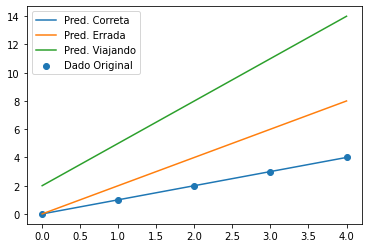

In [10]:
plt.scatter(x,y, label='Dado Original')
plt.plot(x,y_correto, label='Pred. Correta')
plt.plot(x,y_errado, label='Pred. Errada')
plt.plot(x,y_viajando, label='Pred. Viajando')
plt.legend()
plt.show()

# Função de otimização (Gradiente descendente)

$\theta_x:=\theta_x-\alpha\frac{\delta}{\delta_{\theta_x}}J(\theta_X)$

In [32]:
def gds(theta, X, y, alpha=0.1):
    
    #capturar o tamanho da amostra
    m = len(y)
    
    #Criar Matriz X
    X_new = np.c_[np.ones(m),X]
    
    #Predição baseado no theta atual
    y_hat = np.dot(X_new, theta)
    
    #GDS
    dt0 = sum(np.ravel(y_hat)-y)
    dt1 = sum(np.multiply(np.ravel(y_hat)-y,X_new[:,1]))
    
    #Atualizando parametros
    theta[0] = theta[0] - (alpha/m)*dt0
    theta[1] = theta[1] - (alpha/m)*dt1
    
    return theta

## Testando GDS

In [33]:
x = y = [0,1,2,3,4]

In [41]:
theta_certo = [[0],[1]]
theta_errado = [[0],[2]]

In [35]:
#Theta Certo
gds(theta_certo,x,y)

[array([0.]), array([1.])]

In [42]:
#Theta errado
gds(theta_errado,x,y,alpha=0.0001)

[array([-0.0002]), array([1.9994])]

# Regressão Linear

In [48]:
import matplotlib.pyplot as plt
import pylab as pl
from IPython import display

In [74]:
def plot_grafico(X, y, theta, J_hist, ax):
    
        ax[0].scatter(X,y,c='b')

        #Calcular valor predito
        y_pred = np.dot(X_new,theta)

        #plota a predição do gráfico
        ax[0].plot(X,y_pred,'r-')
        ax[0].set_title('Dados reais vs Reta Calculada')

        #Grafico de Custo
        ax[1].plot([i for i in range(len(J_hist))],J_hist,'r-x')
        ax[1].set_title('Custo da função vs Iterações')

        #Atualizar o gráfico
        display.clear_output(wait=True)
        display.display(pl.gcf())

In [60]:
def regressao_linear(X, y, theta, alpha=0.1, num_iters = 100):
    
    #tamanho da amostra
    m = len(y)
    J_hist = []
    
    #Matriz X
    X_new = np.c_[np.ones(m),X]
    
    #Definindo regiões de gráfico
    fig,ax = plt.subplots(1,2, figsize=(12,6))
    
    for iteracao in range(num_iters):
        
        #imprime a evolução do treinamento do modelo
        if iteracao%10 == 0:
            plot_grafico(X, y, theta, J_hist, ax)
            
        #Treinando o modelo 
        theta = gds(theta,X,y,alpha=alpha)
        
        #Historico de custo -> evolução do modelo
        J_hist.append(calcula_custo(theta,X,y))
    
    plt.close()
    return J_hist, theta

## Teste com dado fake

In [50]:
from sklearn.datasets import make_regression

In [51]:
X_fake, y_fake = make_regression(n_features=1,n_samples=100, noise=20.0)

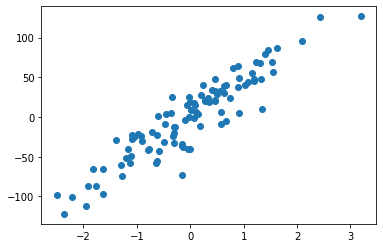

In [52]:
plt.scatter(X_fake,y_fake)

## Testar a regressão Linear

In [72]:
theta_reg = [0,0]

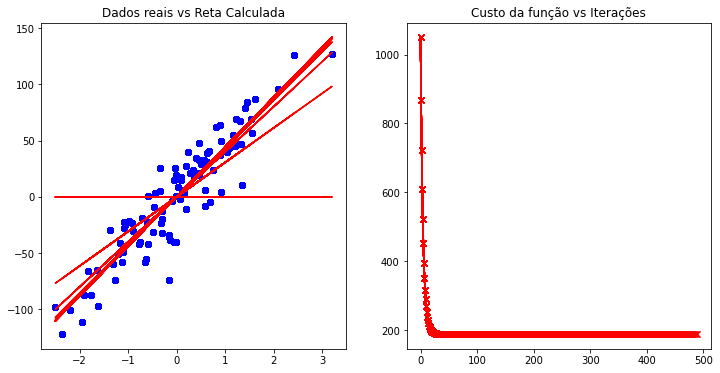

In [73]:
_,theta_calculado = regressao_linear(X_fake, y_fake, theta_reg, alpha = 0.1, num_iters=500)

In [75]:
theta_calculado

[0.2979681420249633, 44.18468908143824]

## Calculando o erro

In [88]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [83]:
m = len(y_fake)

In [84]:
X_new = np.c_[np.ones(m),X_fake]

In [85]:
y_pred = np.dot(X_new,theta_calculado)

In [87]:
mse(y_fake,y_pred)

376.84129519559656

In [89]:
mae(y_fake,y_pred)

15.231630252699503

### Lição de casa
Calcular o MAPE

# Comparação com sklearn

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
reg = LinearRegression()

In [78]:
reg.fit(X_fake,y_fake)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
reg.intercept_

0.29796814202496136

In [80]:
reg.coef_

array([44.18468908])

In [81]:
theta_calculado

[0.2979681420249633, 44.18468908143824]

## Extra
 
Adicionar a condição de parada baseado na atualização do J ( Se o valor do custo não mudar depois de um número de `paciencia` o treinamento encerra)

regressao_linear(X, y, theta, alpha=0.1, num_iters = 100, paciencia = 5, min_update = 1.0e-4)